# Name a more iconic duo... I'll wait

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ellie import data_products, visualize
from astropy.io import fits

# So you want to make a TPF? Pass in a TIC or Gaia ID to get started

In [3]:
dp = data_products(tic=193945542)

In [4]:
# User can pass in a list of sector and camera-chip pairs to download all 
#    FFIs associated with those specifications
# Files will download into .ellie/sector_#/ffis
dp.download_ffis(sector=[1], camera=[3], chips=[3])

In [5]:
# Now that you have some FFIs, you can do ALL THE THINGS! 
#First of all, you can create your own pointing model. If you don't want
#    to create your own (because why should you), we will keep our
#    pointing models stored on the server. ELLIE is written in a way to 
#    access these pointing models, instead of your own
dp.pointing_model(sector=1, camera=3, chip=3)

Grabbing good sources for the pointing model
156 isolated sources will be used to create the pointing model


100%|██████████| 76/76 [00:00<00:00, 142.66it/s]


In [6]:
# YAY pointing model! Now what? Well, ELLIE makes TPFs from postcards,
#     which means that if you are going through the motions of downloading
#     all the FFIs and making a pointing model, you also have to make some
#     postcards
dp.make_postcard(sector=1, camera=3, chip=3)

In [7]:
# Coooool, but also what if I *don't* want to run through all these
#     motions?
# Indeed, we tailor to people like you! The ELLIE team has already created
#     all of these postcards and they are stored online! You can find the postcard your
#     target falls on by using the following function:
postcard, post_header = dp.find_postcard()
print(postcard)

postcard_1_3-3_0-4.fits


postcard_1_3-3_0-4.fits
*************
We're doing our best to find the ideal aperture shape & size for your source.
*************


  0%|          | 0/1 [00:00<?, ?it/s]

*************
Please hold while we do some systematics corrections.
*************


100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


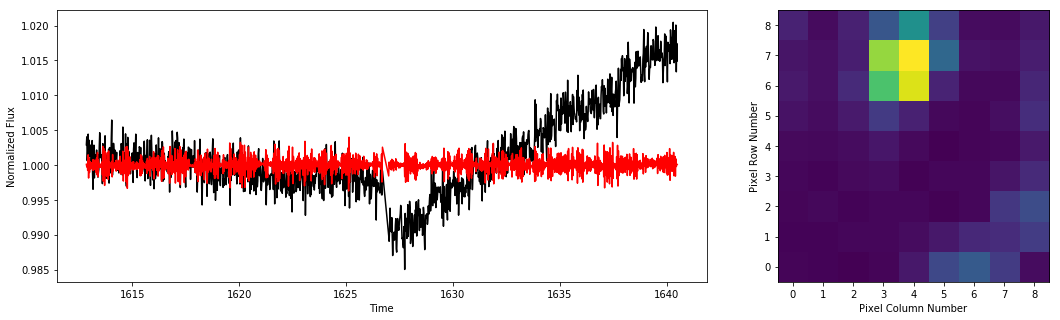

In [8]:
# Aww, but now I have to go to your secret website and download the fits file and
#     I'm not sure what directory it's in and blah blah blah hastle hastle
# Yeah, we've thought this through. When you create a TPF for your source, ELLIE
#     automatically finds the postcard it falls on and downloads it 
# TLDR: It's like real life magic
tpf_fn = dp.individual_tpf()
dp.plot()

In [9]:
# Don't like our optimized aperture? We won't take it personally. In fact, ELLIE even 
#     gives you the option to do-it-yourself
# Appropriate shapes are: circle & rectangle
lc = dp.custom_aperture(shape='rectangle', l=2.0, w=2.0, input_fn=tpf_fn, pos=[4,4])

postcard_1_3-3_0-4.fits


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


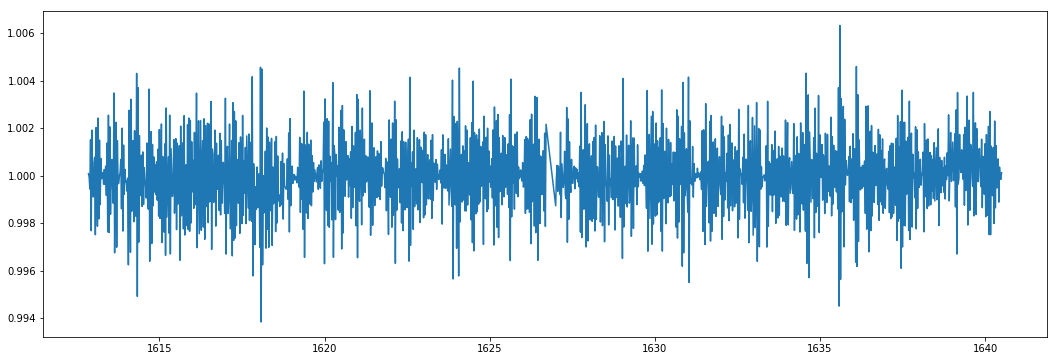

In [10]:
hdu = fits.open(tpf_fn)
plt.figure(figsize=(18,6))
plt.plot(hdu[1].data[0], lc)
plt.show()

# Now we can do it all again, but with a Gaia ID!

In [11]:
dp = data_products(gaia=1395737656781260544)
tpf_fn = dp.individual_tpf()

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


Sorry! We don't have a postcard for you. Please double check your source has been observed by TESS


In [12]:
dp = data_products(gaia=1621338338785983232)
tpf_fn = dp.individual_tpf()

postcard_1_3-4_6-1.fits


IndexError: list index out of range

# Let's all go to the moooviesss

In [4]:
vis = visualize(tic=193945542)

In [14]:
p = vis.mark_gaia()
from bokeh.io import show
show(p)

postcard_1_3-3_0-4.fits


Loading BokehJS ...

KeyboardInterrupt: 

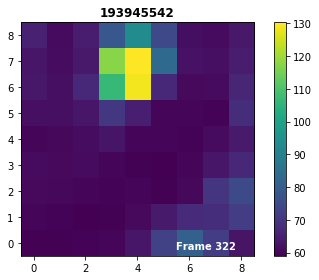

In [9]:
ani = vis.tpf_movie()
from IPython.display import HTML
HTML(ani.to_html5_video())